In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("dataset/raw_data.csv", index_col= False)
data.head()

,date,time,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data.shape

(2313682, 8)

In [4]:
data.isnull().sum()

date            0
time            0
epoch           0
moteid        526
temp          901
humidity      902
light       93878
voltage       526
dtype: int64

In [5]:
data.dropna(inplace= True)

In [6]:
data.shape

(2219803, 8)

In [7]:
data.duplicated().sum()

0

In [8]:
data[['epoch', 'moteid','temp','humidity','light','voltage']] = data[['epoch', 'moteid','temp','humidity','light','voltage']].astype(float)
data['timestamp'] = data[['date', 'time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
data.describe()

,epoch,moteid,temp,humidity,light,voltage
count,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06
mean,3.301138e+04,2.847831e+01,3.923349e+01,3.373195e+01,4.072112e+02,2.490634e+00
std,1.838041e+04,1.503397e+01,3.742116e+01,1.724057e+01,5.394277e+02,1.784080e-01
min,0.000000e+00,1.000000e+00,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,1.757500e+04,1.700000e+01,2.045880e+01,3.184240e+01,3.956000e+01,2.385220e+00
50%,3.329200e+04,2.900000e+01,2.246780e+01,3.921230e+01,1.582400e+02,2.527320e+00
75%,4.776500e+04,4.100000e+01,2.697580e+01,4.348570e+01,5.372800e+02,2.627960e+00
max,6.553500e+04,5.800000e+01,3.855680e+02,1.375120e+02,1.847360e+03,3.159150e+00


In [9]:
del data['date']
del data['time']

In [10]:
df = data[(data["moteid"] >= 1) & (data["moteid"] <= 54)]
df = data[data['timestamp'] < '2004-03-20']
df.head()

,epoch,moteid,temp,humidity,light,voltage,timestamp
1,3.0,1.0,19.9884,37.0933,45.08,2.69964,2004-02-28 00:59:16.02785
2,11.0,1.0,19.3024,38.4629,45.08,2.68742,2004-02-28 01:03:16.33393
3,17.0,1.0,19.1652,38.8039,45.08,2.68742,2004-02-28 01:06:16.013453
4,18.0,1.0,19.1750,38.8379,45.08,2.69964,2004-02-28 01:06:46.778088
5,22.0,1.0,19.1456,38.9401,45.08,2.68742,2004-02-28 01:08:45.992524


In [11]:
df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647543 entries, 1 to 2303659
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   epoch      1647543 non-null  float64       
 1   moteid     1647543 non-null  float64       
 2   temp       1647543 non-null  float64       
 3   humidity   1647543 non-null  float64       
 4   light      1647543 non-null  float64       
 5   voltage    1647543 non-null  float64       
 6   timestamp  1647543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.6 MB


C:\Users\pares\AppData\Local\Temp\ipykernel_20604\3514681124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.timestamp = pd.to_datetime(df.timestamp)


In [12]:
df.to_csv('dataset/clean_data.csv', index= False)

In [13]:
df= pd.read_csv('dataset/clean_data.csv', parse_dates=['timestamp'], index_col=['timestamp'])

### Resampling Data

In [14]:
def data_3min (df):

    # Sort the DataFrame by index
    df = df.sort_index()

    # resample data to 3 minute intervals
    df = df.resample('3T').mean()

    # remove rows with negative values
    df = df[(df >= 0).all(1)]

    df.dropna(inplace=True)


    return df

In [15]:
df_3min = data_3min (df)
df_3min.shape

(9192, 6)

### Normalizing Data

In [16]:
def normalize_data(df):   

    # normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    df.dropna(inplace=True)


    return df

In [17]:
data= normalize_data(df_3min)
data.head()

,epoch,moteid,temp,humidity,light,voltage
timestamp,,,,,,
2004-02-28 00:57:00,0.000000,0.323886,0.165536,0.576690,0.092058,0.929083
2004-02-28 01:00:00,0.000082,0.240210,0.136359,0.640081,0.095537,0.872011
2004-02-28 01:03:00,0.000190,0.171442,0.125242,0.662393,0.094816,0.861946
2004-02-28 01:06:00,0.000282,0.509247,0.115144,0.657819,0.129830,0.877583
2004-02-28 01:09:00,0.000373,0.497003,0.112290,0.655014,0.113750,0.869883


### Remove Outliers

In [18]:
def remove_outliers_iqr(df, factor=1.5):
    # Calculate the interquartile range (IQR) for each column
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    # Remove rows with values outside the range [Q1 - factor * IQR, Q3 + factor * IQR]
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df

In [19]:
data= remove_outliers_iqr(data)
data.shape

(8732, 6)

### Extracting Timestamp Features

In [20]:
# data['year'] = data.index.year
# data['month'] = data.index.month
# data['day'] = data.index.day
# data['hour'] = data.index.hour
# data['minute'] = data.index.minute
# data['second'] = data.index.second
# data['weekday'] = data.index.weekday # Monday=0, Sunday=6

# data.head()

In [21]:
print("Starting date:",data.index.min())
print("Ending date:", data.index.max())

Starting date: 2004-02-28 00:57:00
Ending date: 2004-03-19 23:57:00


### Creating Time Lag Feature

In [22]:
parameters= ['epoch','temp','humidity','light','voltage']

In [23]:
def timelag(data, parameters, i):
    # Shift the data forward 1 Hr.
    df = data[parameters].shift(i)

    # Names for the new variables.
    df.columns = [j + "_lag_"+ str(i) for j in parameters]
    data = data.merge(df, left_index=True, right_index=True, how="left")
    
    data.shape

    return data

In [24]:
data.shape

(8732, 6)

In [25]:
data= timelag(data, parameters, 1)
data.shape

(8732, 11)

In [26]:
data= timelag(data, parameters, 2)
data.shape

(8732, 16)

In [27]:
data.shape

(8732, 16)

In [28]:
data.columns

Index(['epoch', 'moteid', 'temp', 'humidity', 'light', 'voltage',
       'epoch_lag_1', 'temp_lag_1', 'humidity_lag_1', 'light_lag_1',
       'voltage_lag_1', 'epoch_lag_2', 'temp_lag_2', 'humidity_lag_2',
       'light_lag_2', 'voltage_lag_2'],
      dtype='object')

### Create Rolling Statistics Feature

In [29]:
window_size = 5

for parameter in ['temp', 'humidity', 'light', 'voltage']:
    data[f'{parameter}_rolling_mean'] = data[parameter].rolling(window_size).mean()
    data[f'{parameter}_rolling_std'] = data[parameter].rolling(window_size).std()


In [30]:

data.shape

(8732, 24)

In [31]:
data.columns

Index(['epoch', 'moteid', 'temp', 'humidity', 'light', 'voltage',
       'epoch_lag_1', 'temp_lag_1', 'humidity_lag_1', 'light_lag_1',
       'voltage_lag_1', 'epoch_lag_2', 'temp_lag_2', 'humidity_lag_2',
       'light_lag_2', 'voltage_lag_2', 'temp_rolling_mean', 'temp_rolling_std',
       'humidity_rolling_mean', 'humidity_rolling_std', 'light_rolling_mean',
       'light_rolling_std', 'voltage_rolling_mean', 'voltage_rolling_std'],
      dtype='object')

### Dropping Missing Values

In [32]:
data.isnull().sum()

epoch                    0
moteid                   0
temp                     0
humidity                 0
light                    0
voltage                  0
epoch_lag_1              1
temp_lag_1               1
humidity_lag_1           1
light_lag_1              1
voltage_lag_1            1
epoch_lag_2              2
temp_lag_2               2
humidity_lag_2           2
light_lag_2              2
voltage_lag_2            2
temp_rolling_mean        4
temp_rolling_std         4
humidity_rolling_mean    4
humidity_rolling_std     4
light_rolling_mean       4
light_rolling_std        4
voltage_rolling_mean     4
voltage_rolling_std      4
dtype: int64

In [33]:
data.dropna(inplace= True)

In [34]:
data.shape

(8728, 24)

### Feature Importance

In [35]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

def feature_importances_xgb(data, target):
    # Split the data into training and testing sets
    train_data_xgb = data.iloc[:7000, :]


    # Separate the features and target variables
    X_train_xgb = train_data_xgb.drop(target, axis=1)
    y_train_xgb = train_data_xgb[target]

    # Train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model.fit(X_train_xgb, y_train_xgb)

    # Get the feature importances from the model
    feature_importances = xgb_model.feature_importances_

    # Sort the feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Get the top 10 most important features
    top_n = 10
    top_features = X_train_xgb.columns[indices][:top_n]
    top_importances = feature_importances[indices][:top_n]

    # Plot the feature importances using a horizontal bar chart
    graph= plt.figure(figsize=(10, 5))
    sns.barplot(x=top_importances, y=top_features, palette='viridis')
    plt.title('Top 10 Most Important Features for prediciting {}' .format(target.capitalize()))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    graph.savefig(f"./Graphs/feature_importance/XGB_top10_important_features_for_{target}.pdf", bbox_inches='tight')
    plt.show()


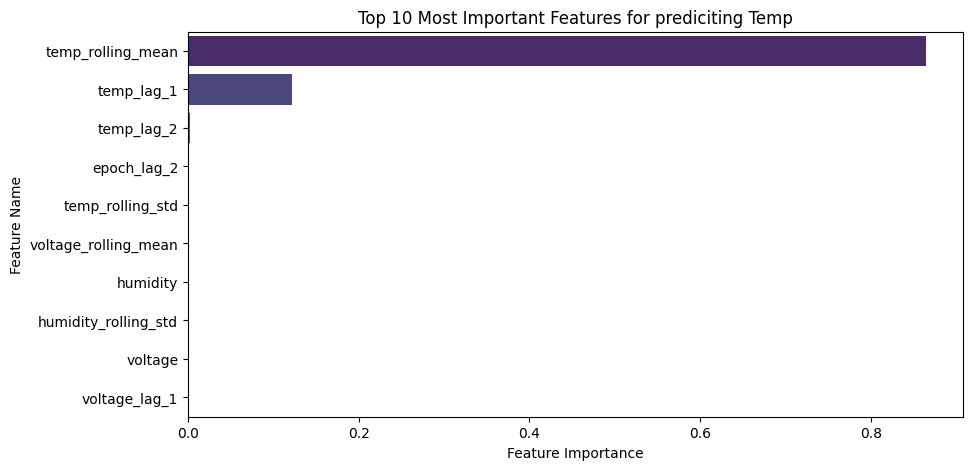

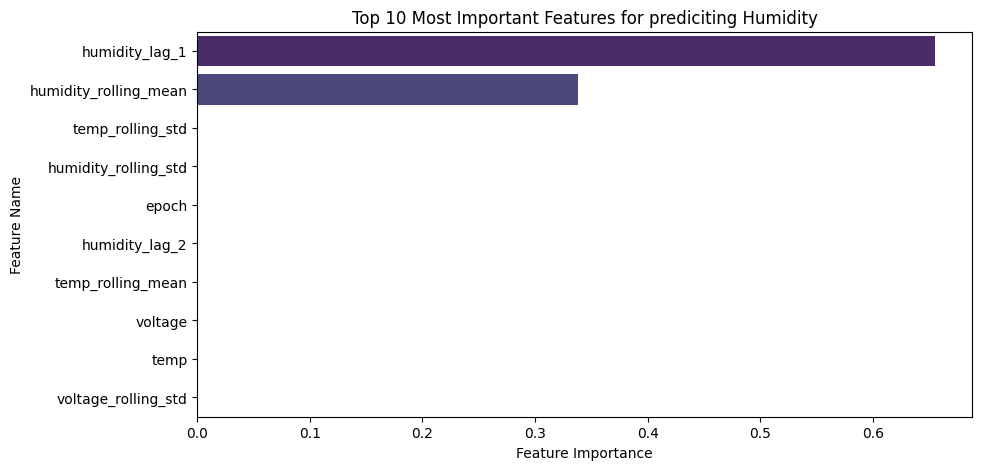

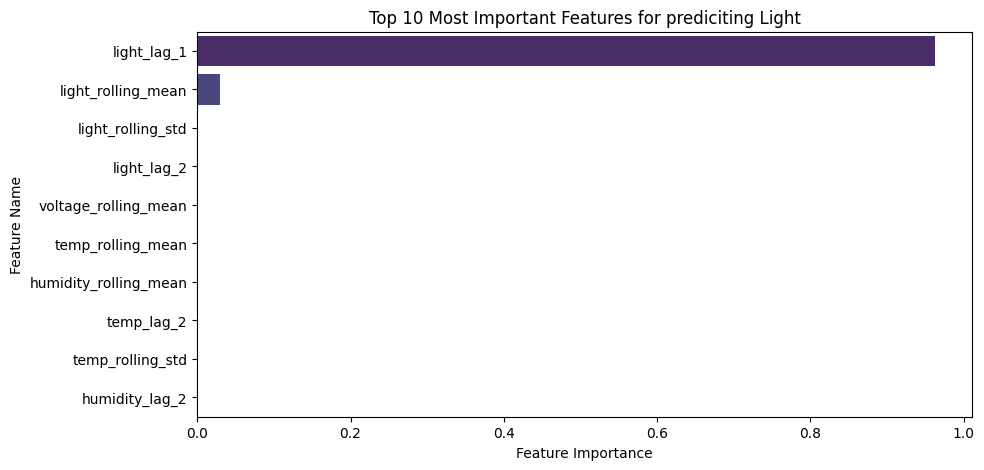

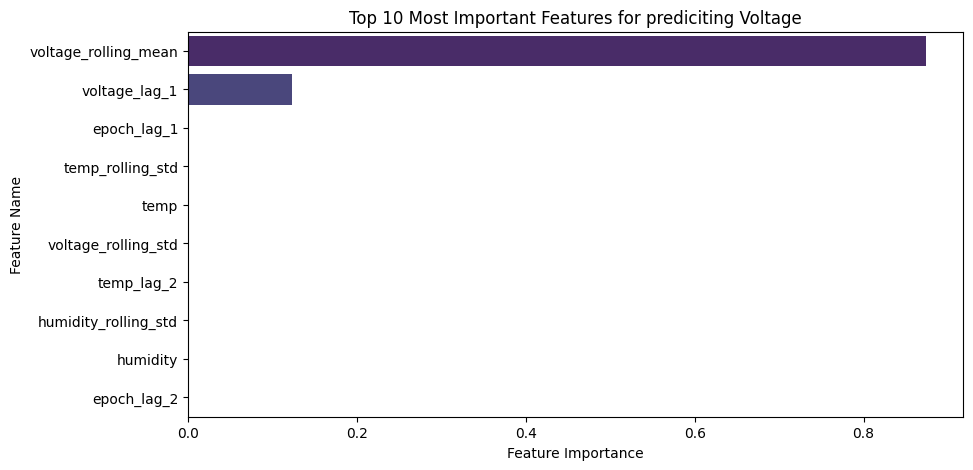

In [36]:
target= ['temp','humidity', 'light', 'voltage']

for i in target:
    feature_importances_xgb(data, i)

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

def feature_importances_dt(data, target):
    # Split the data into training and testing sets
    train_data_dt = data.iloc[:7000, :]


    # Separate the features and target variables
    X_train_dt = train_data_dt.drop(target, axis=1)
    y_train_dt = train_data_dt[target]

    # Train the XGBoost model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_dt, y_train_dt)

    # Get the feature importances from the model
    feature_importances = dt_model.feature_importances_

    # Sort the feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Get the top 10 most important features
    top_n = 10
    top_features = X_train_dt.columns[indices][:top_n]
    top_importances = feature_importances[indices][:top_n]

    # Plot the feature importances using a horizontal bar chart
    graph= plt.figure(figsize=(10, 5))
    sns.barplot(x=top_importances, y=top_features, palette='viridis')
    plt.title('Top 10 Most Important Features for prediciting {}' .format(target.capitalize()))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    graph.savefig(f"./Graphs/feature_importance/DecisionTree_top10_important_features_for_{target}.pdf", bbox_inches='tight')
    plt.show()


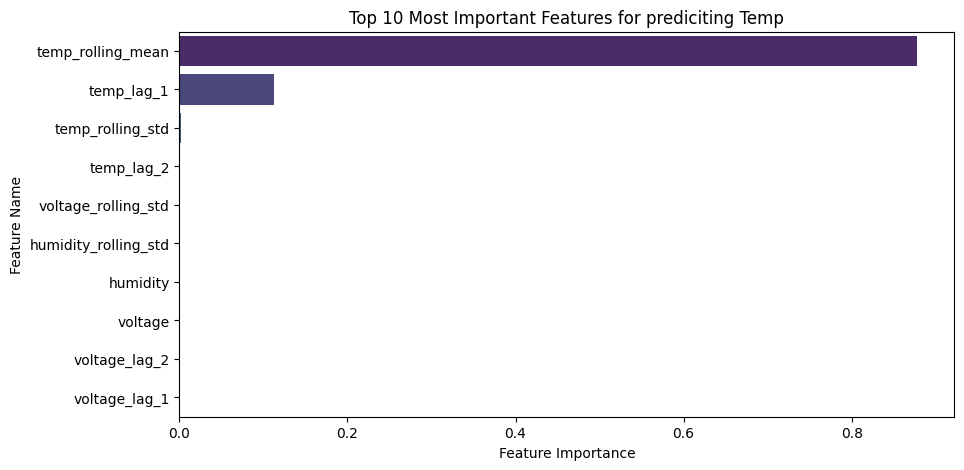

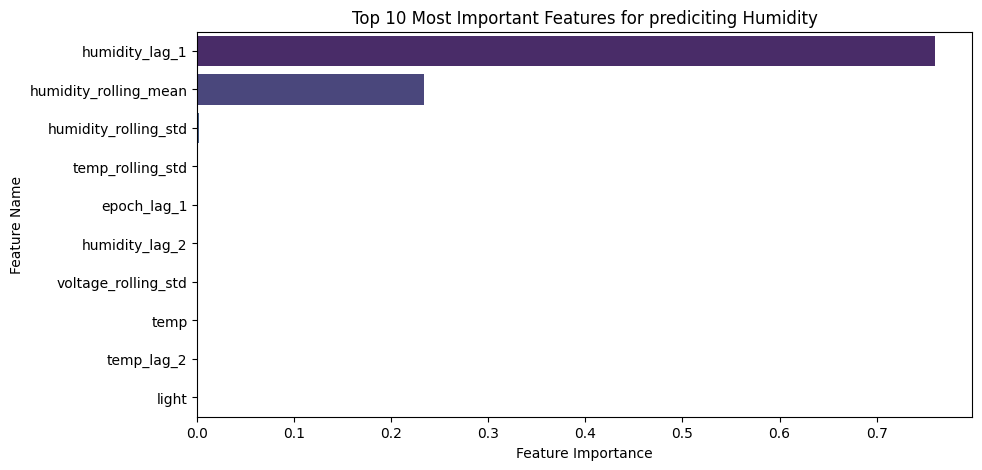

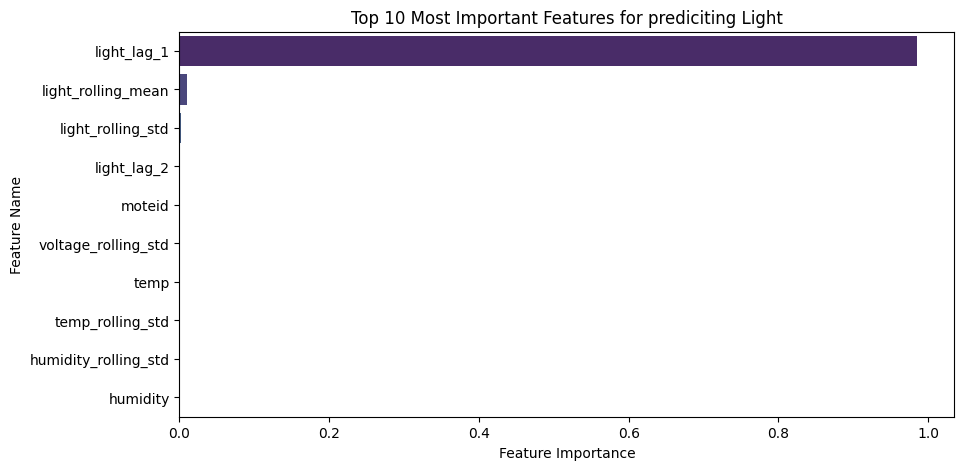

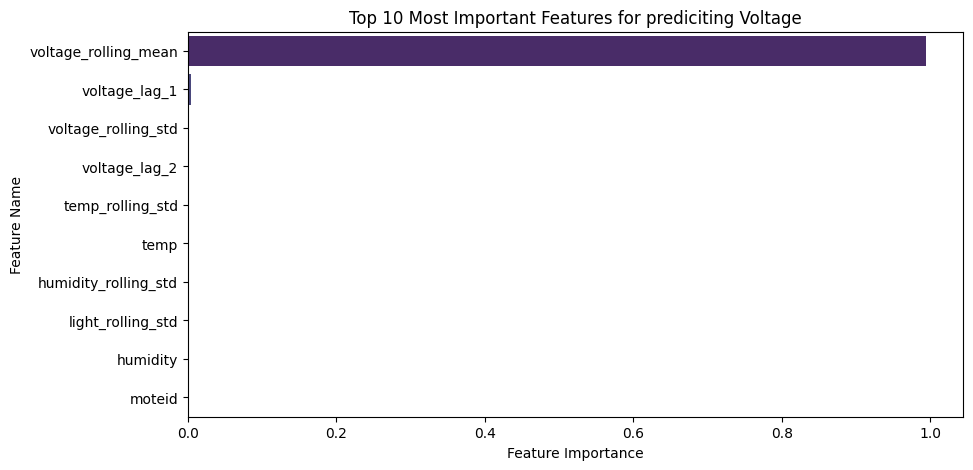

In [38]:
for i in target:
    feature_importances_dt(data, i)

### Saving the Preprocessed Data

In [39]:
data.to_csv('dataset/preprocessed_data.csv')

In [40]:
data.shape

(8728, 24)